# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy import stats

In [26]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [5]:
def analise_bivariada(df, var_resposta, var_explicativa):
    # Gera uma tabela cruzada entre as variáveis e calcula a frequência
    cruzada = pd.crosstab(df[var_explicativa], df[var_resposta], normalize='index')
    cruzada = cruzada.rename_axis(var_explicativa).reset_index()
    return cruzada

In [6]:
print(analise_bivariada(df, 'flag_doente', 'sex'))
print(analise_bivariada(df, 'flag_doente', 'cp'))
print(analise_bivariada(df, 'flag_doente', 'thal'))

flag_doente  sex         0         1
0            0.0  0.742268  0.257732
1            1.0  0.446602  0.553398
flag_doente   cp         0         1
0            1.0  0.695652  0.304348
1            2.0  0.820000  0.180000
2            3.0  0.790698  0.209302
3            4.0  0.270833  0.729167
flag_doente thal         0         1
0            3.0  0.777108  0.222892
1            6.0  0.333333  0.666667
2            7.0  0.239316  0.760684
3              ?  0.500000  0.500000


Pessoas com sex=1 têm maior proporção de doença. A variável "sex" consegue distinguir um pouco quem tem ou não doença.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [7]:
def analise_bivariada_quantitativa(df, var_resposta, var_quantitativa, n_grupos=5):
    # Divide a variável quantitativa em n_grupos usando pd.qcut
    grupos = pd.qcut(df[var_quantitativa], q=n_grupos, duplicates='drop')
    
    # Faz uma tabela cruzada
    cruzada = pd.crosstab(grupos, df[var_resposta], normalize='index')
    
    # Renomeia o índice
    cruzada = cruzada.rename_axis(f'{var_quantitativa}_grupos').reset_index()
    return cruzada

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [8]:
X = df[['sex', 'cp', 'trestbps', 'age']] 
y = df['flag_doente']

modelo = LogisticRegression()
modelo.fit(X, y)

print('Intercept:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)

Intercept: [-10.58590104]
Coeficientes: [[1.6189093  1.09319923 0.02054063 0.05571101]]


Intercept = -10.6 --> valor base do logit quando todas as variáveis são iguais a 0.

sex = 1.62 --> se o valor de 'sex' aumenta de 0 para 1, a chance de ser doente aumenta bastante, pois o coeficiente é positivo.

cp = 1.09 --> cada unidade a mais em 'cp' aumenta o logit da doença.

trestbps = 0.03 --> para cada unidade a mais de 'trestbps', o risco aumenta um pouco.

age = 0.05 --> cada ano a mais de idade eleva o risco, mas o efeito é mais discreto.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [17]:
# Calcule a probabilidade de evento predita segundo o seu modelo
prob_evento = modelo.predict_proba(X)[:,1]

In [18]:
# Categorize essa probabilidade em G=5 grupos
G = 5
grupos = pd.qcut(prob_evento, q=G, labels=False)

In [19]:
# Calcule a probabilidade de evento predita média por grupo
calib = pd.DataFrame({'prob_prevista': prob_evento, 'grupo': grupos, 'evento': y})

media_prevista = calib.groupby('grupo')['prob_prevista'].mean()

In [20]:
# Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
media_observada = calib.groupby('grupo')['evento'].mean()

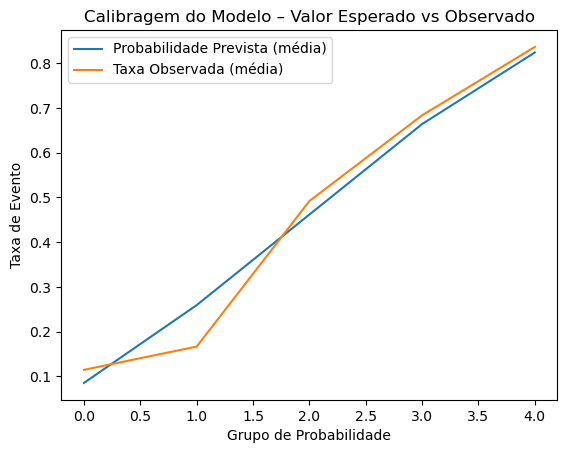

In [21]:
# Compare graficamente o valor eperado versus observado para a taxa de maus por grupo
plt.plot(media_prevista, label="Probabilidade Prevista (média)")
plt.plot(media_observada, label="Taxa Observada (média)")
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Taxa de Evento')
plt.title('Calibragem do Modelo – Valor Esperado vs Observado')
plt.legend()
plt.show()

O modelo está bem calibrado, embora haja pequenas diferenças.

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [27]:
# Acurácia
y_pred = modelo.predict(X)
acuracia = accuracy_score(y, y_pred)
print(f"Acurácia: {acuracia:.3f}")

Acurácia: 0.772


In [28]:
# GINI
prob_evento = modelo.predict_proba(X)[:,1]
auc = roc_auc_score(y, prob_evento)
gini = 2 * auc - 1
print(f"GINI: {gini:.3f}")

GINI: 0.663


In [29]:
# KS
probs_evento = prob_evento[y == 1]
probs_nao_evento = prob_evento[y == 0]
ks = stats.ks_2samp(probs_evento, probs_nao_evento)
print(f"KS: {ks.statistic:.3f}")

KS: 0.597


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [30]:
variaveis = ['sex', 'cp', 'trestbps', 'age', 'chol', 'oldpeak']  # ajuste conforme desejar
X_novo = df[variaveis]
y = df['flag_doente']

In [31]:
modelo_novo = LogisticRegression()
modelo_novo.fit(X_novo, y)

C:\Users\cepir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
prob_evento_novo = modelo_novo.predict_proba(X_novo)[:,1]
G = 5
grupos = pd.qcut(prob_evento_novo, q=G, labels=False)
calib = pd.DataFrame({'prob_prevista': prob_evento_novo, 'grupo': grupos, 'evento': y})
media_prevista = calib.groupby('grupo')['prob_prevista'].mean()
media_observada = calib.groupby('grupo')['evento'].mean()

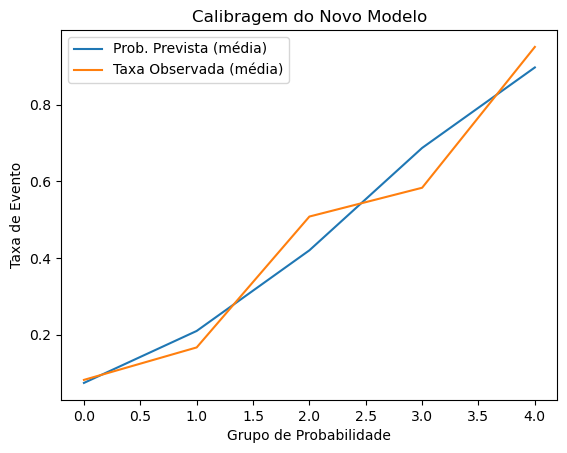

In [33]:
plt.plot(media_prevista, label="Prob. Prevista (média)")
plt.plot(media_observada, label="Taxa Observada (média)")
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Taxa de Evento')
plt.title('Calibragem do Novo Modelo')
plt.legend()
plt.show()

In [37]:
# Acurácia nova
y_pred_novo = modelo_novo.predict(X_novo)
acuracia_nova = accuracy_score(y, y_pred_novo)
print(f"Acurácia nova: {acuracia_nova:.3f}")

Acurácia nova: 0.776


In [39]:
# AUC novo
auc_novo = roc_auc_score(y, prob_evento_novo)
print(f"AUC novo: {auc_novo:.3f}")

AUC novo: 0.864
